In [1]:
import pandas as pd

from llm_political_analysis.modules.summarize import summarize_text
from llm_political_analysis.modules.prompts import get_prompts, policy_areas
from llm_political_analysis.modules.analyze import analyze_text

### Setup the file, issue area and model you want to use

In [17]:
# EDIT THIS WITH YOUR OWN FILE
filepath = '../data/plaintext/0 Calibration - HUN 2010 Soc Dem.txt'

# OPTIONS ARE 'european_union', 'taxation', 'lifestyle', 'immigration', 'environment', 'decentralization'
issue_area = 'taxation'
if issue_area not in policy_areas:
    raise ValueError(f'Invalid issue area: {issue_area}')

# OPTIONS ARE 'gpt-4o', 'gpt-4', 'gpt-3.5-turbo'
model = 'gpt-4'
if model not in ['gpt-4o', 'gpt-4', 'gpt-3.5-turbo']:
    raise ValueError(f'Invalid model: {model}')

# Read the long manifesto text from a .txt file
with open(filepath, 'r') as file:
    long_manifesto_text = file.read()

### Generates a summary of the chosen file, with a focus on a specific issue area


In [4]:
# Summarize the long manifesto text
manifesto_summary = summarize_text(long_manifesto_text, policy_areas.get(issue_area, 'general policy issues'))
print(manifesto_summary)

1. Protection of democracy and parliamentary republic.
2. Protection of minority rights and support for Hungarian minorities abroad.
3. Significant increase in state support for healthcare, education, culture, research, and science.
4. Job creation and protection through state investments and guarantees; radical taxation of high incomes; support for wage earners through tax and contribution refunds.
5. Free choice of doctors and healthcare institutions; significant salary increase for healthcare workers.
6. Establishment of a health insurance fund with independent parliamentary oversight; maintenance of unified national social insurance.
7. State-guaranteed pension value stability; retirement after 40 years of service upon request.
8. Significant increase in the education budget; equal opportunities and freedom in education; compulsory schooling tied to completing 8 grades.
9. Credible mass communication based on a realistic budget and plurality; fight against corruption and bribery.
1

### Create a list of prompts to try
#### If you'd like to modify the prompt list, you can either edit modules/prompts.py or create a list here

In [5]:
prompts = get_prompts(issue_area, manifesto_summary)
print(f'Got {len(prompts)} prompts to try, for example: \n {prompts[0]}')


Got 9 prompts to try, for example: 
 [{'role': 'system', 'content': 'You are an expert social scientist with a PhD in political science. This will be fun! You are conducting research on the policy positions that European parties in parliamentary democracies take in their political manifestos. Political manifestos are documents parties produce to explain their policy positions to voters in an election. For the following text of a party manifesto, please classify the party position on the overall orientation of the party toward Spending versus Taxation. Classify the manifesto on this policy using a ten point scale, where a 1 means strongly favors improving public services, a 5 means the party takes a position in the middle or balanced position between raising spending and reducing taxes, and a 10 means strongly favors reducing taxes. If the text of the manifesto does not provide a clear position on spending vs taxation, return the result of NA (meaning non-applicable).Only give the score

### Iterate over the prompts and analyze the manifesto with each, collecting the results. 

In [18]:
# Analyze the manifesto summary with different prompts
results = []
for prompt in prompts:
    print(f'Analyzed so far: {len(results)} out of {len(prompts)} prompts', end='\r')
    response_dict = analyze_text(prompt, model=model, probabilities=True)
    response_dict['prompt'] = prompt
    print(response_dict)
    results.append(response_dict)

{'score': 2, 'explanation': 'The party strongly favors improving public services and supports higher taxation for high incomes.', 'prob': 0.8491306054922858, 'prompt': [{'role': 'system', 'content': 'You are an expert social scientist with a PhD in political science. This will be fun! You are conducting research on the policy positions that European parties in parliamentary democracies take in their political manifestos. Political manifestos are documents parties produce to explain their policy positions to voters in an election. For the following text of a party manifesto, please classify the party position on the overall orientation of the party toward Spending versus Taxation. Classify the manifesto on this policy using a ten point scale, where a 1 means strongly favors improving public services, a 5 means the party takes a position in the middle or balanced position between raising spending and reducing taxes, and a 10 means strongly favors reducing taxes. If the text of the manife

In [11]:
# Display the results in a DataFrame
df_results = pd.DataFrame(results)
df_results['filepath'] = filepath
df_results['issue_area'] = issue_area
df_results

,score,explanation,prob,prompt,filepath,issue_area
0,2,The manifesto strongly emphasizes increasing s...,0.773219,"[{'role': 'system', 'content': 'You are an exp...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
1,2,The manifesto strongly emphasizes increasing s...,0.656897,"[{'role': 'system', 'content': 'You are an exp...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
2,2,The manifesto emphasizes significant increases...,0.763785,"[{'role': 'system', 'content': 'You are an exp...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
3,2,The manifesto strongly favors improving public...,0.843121,"[{'role': 'system', 'content': 'You are highly...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
4,2,The manifesto strongly emphasizes increasing s...,0.767837,"[{'role': 'system', 'content': 'You are highly...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
5,1,The manifesto strongly favors improving public...,0.480271,"[{'role': 'system', 'content': 'You are highly...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
6,2,The manifesto strongly favors increasing publi...,0.740534,"[{'role': 'system', 'content': 'You are a prof...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
7,2,The manifesto strongly emphasizes increasing s...,0.793100,"[{'role': 'system', 'content': 'You are a prof...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation
8,2,The manifesto strongly favors increasing publi...,0.638802,"[{'role': 'system', 'content': 'You are a prof...",../data/plaintext/0 Calibration - HUN 2010 Soc...,taxation


<Axes: xlabel='score'>

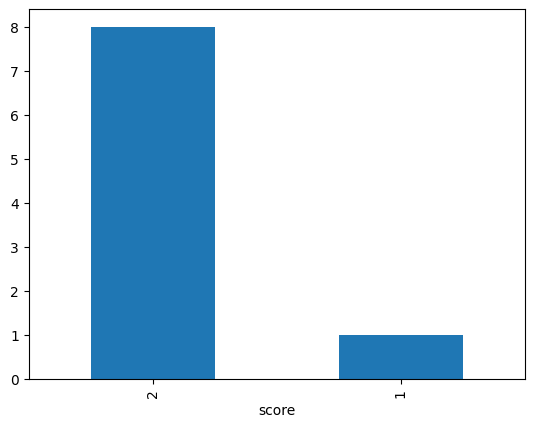

In [16]:
df_results.score.value_counts().plot.bar()

In [9]:
df_results.to_excel('../data/results/manifesto_analysis_results.xlsx', index=False)